In [3]:
# Check time stamps
# Inspect data and visualize the time stamps of the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

tdf = pd.read_csv('data/Electric_Production.csv', parse_dates=["DATE"], index_col="DATE")

In [6]:
print(tdf.head())

            IPG2211A2N
DATE                  
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151


In [8]:
# checking for missing values
tdf.isnull().sum()

IPG2211A2N    0
dtype: int64

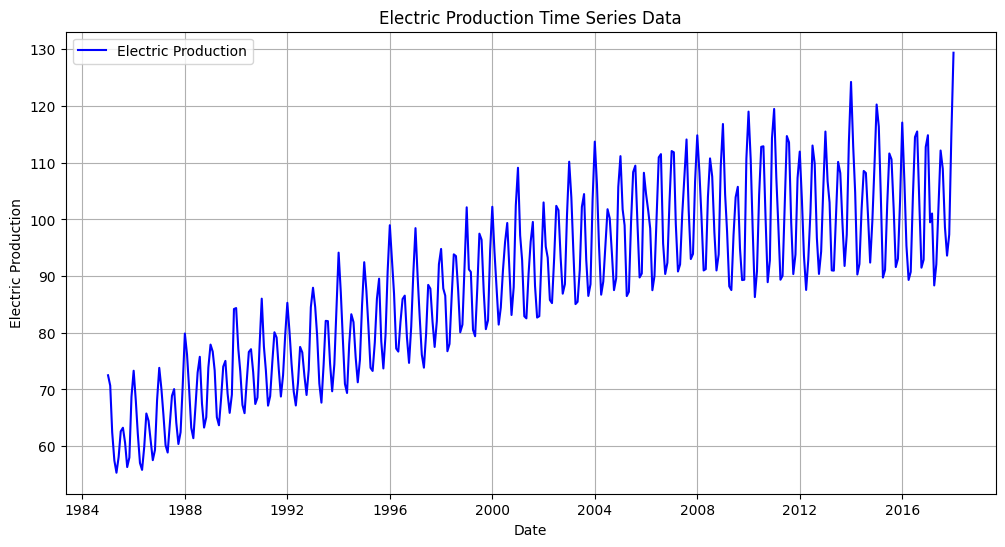

In [10]:
# plotting the TSD
plt.figure(figsize=(12, 6))
plt.plot(tdf.index, tdf["IPG2211A2N"], label="Electric Production", color="blue")
plt.title("Electric Production Time Series Data")
plt.xlabel("Date")
plt.ylabel("Electric Production")
plt.grid(True)
plt.legend()
plt.show()

In [12]:
tdf.index.duplicated().sum()  # check for duplicate timestamps

np.int64(0)

In [15]:
! pip install statsmodels

  Using cached scipy-1.15.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.8 MB 1.7 MB/s eta 0:00:06
    --------------------------------------- 0.1/9.8 MB 1.4 MB/s eta 0:00:07
    --------------------------------------- 0.2/9.8 MB 1.6 MB/s eta 0:00:07
   - -------------------------------------- 0.3/9.8 MB 1.6 MB/s eta 0:00:06
   - -------------------------------------- 0.4/9.8 MB 1.6 MB/s eta 0:00:06
   - -------------------------------------- 0.5/9.8 MB 1.7 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/9.8 MB 1.7 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/9.8 MB 1.7 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/9.8 MB 1.7 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/9.8 MB 1.8 MB/s eta 0:00:06
   --- ------------------------------------ 0.9/9.8 MB 1.8 MB/s eta 0:00:06
   ---- ----------------


[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


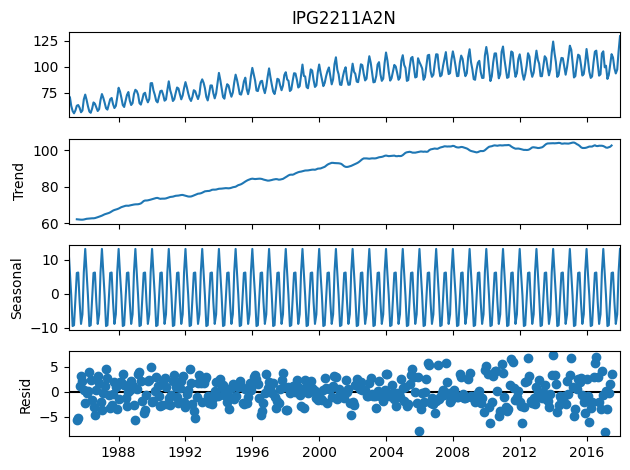

In [16]:
# EDA
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series data
result = seasonal_decompose(tdf["IPG2211A2N"], model='additive', period=12)



# Plot decomposition
result.plot()
plt.show() 

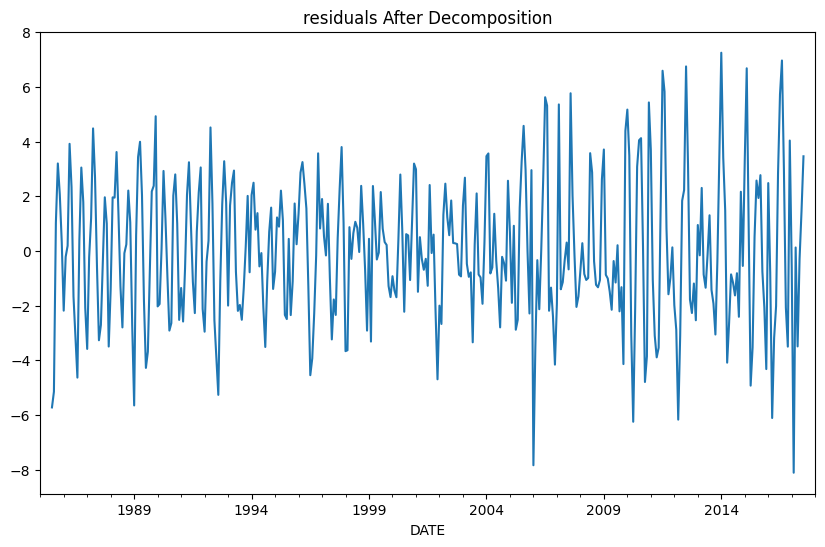

DATE
2006-01-01   -7.835856
2017-02-01   -8.109151
Name: resid, dtype: float64


In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose


# Decompose 
result = seasonal_decompose(tdf["IPG2211A2N"], model='additive', period=12)
residual = result.resid

# Plot residuals
residual.plot(figsize=(10, 6))
plt.title("residuals After Decomposition")
plt.show()


# Detect large residuals
outliers = residual[np.abs(residual) > 3 * residual.std()]
print(outliers)